In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv("titanic.csv", encoding="latin1")
print(df.head(5))

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [20]:
df = df.drop(columns='Cabin', axis=1)
df['Age'].fillna(df['Age'].mean(), inplace=True)
print(df['Embarked'].mode())
print(df['Embarked'].mode()[0])
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()


0    S
Name: Embarked, dtype: object
S


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [23]:
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

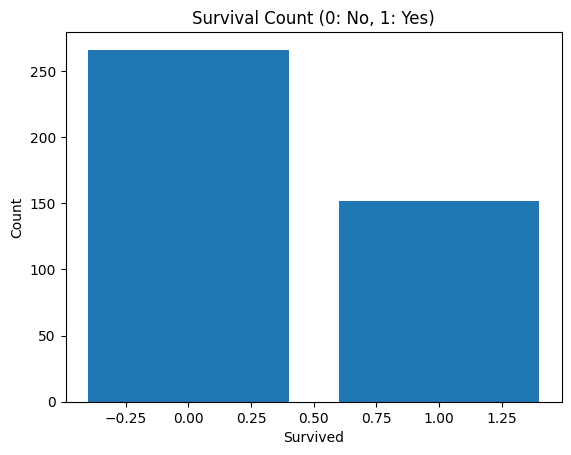

In [ ]:
import matplotlib.pyplot as plt
survival_counts = df['Survived'].value_counts()
plt.bar(survival_counts.index, survival_counts.values)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0: No, 1: Yes)')
plt.show()


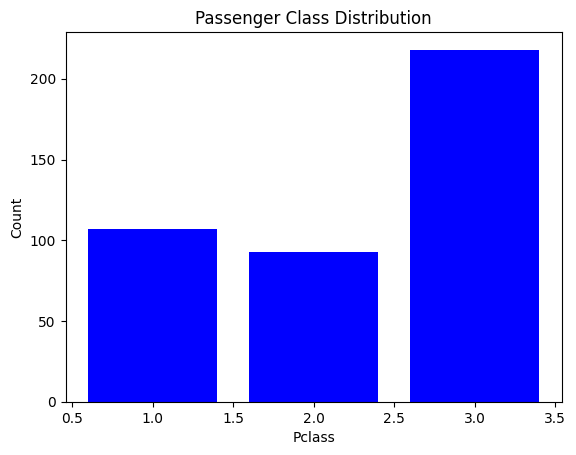

In [ ]:
# Count the number of passengers in each class
pclass_counts = df['Pclass'].value_counts()

# Create a bar chart
plt.bar(pclass_counts.index, pclass_counts.values, color='blue')

# Add labels and title
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Passenger Class Distribution')

# Show the plot
plt.show()


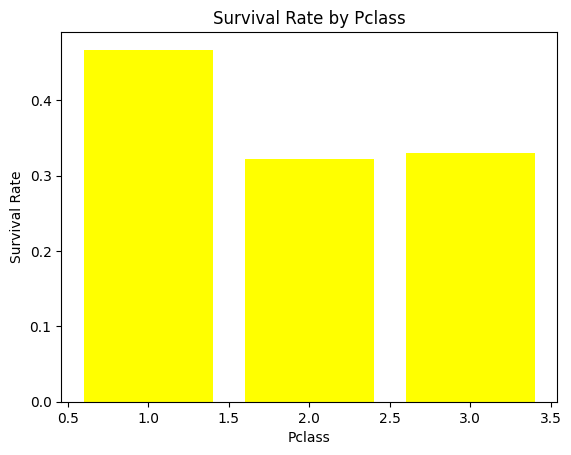

In [ ]:
pclass_survival = df.groupby('Pclass')['Survived'].mean()
plt.bar(pclass_survival.index, pclass_survival.values, color='yellow')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Pclass')
plt.show()

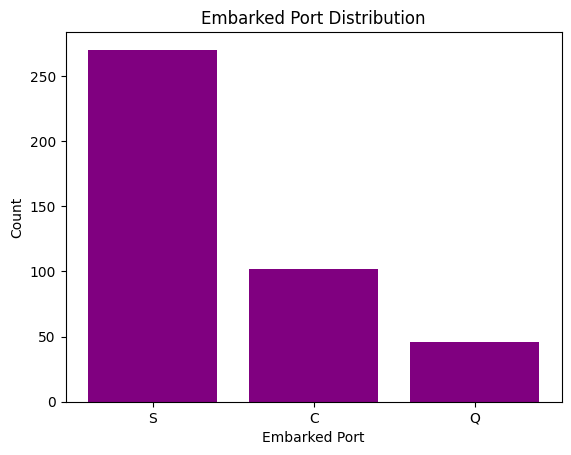

In [ ]:
# Count the number of passengers embarked at each port
embarked_counts = df['Embarked'].value_counts()

# Create a bar chart
plt.bar(embarked_counts.index, embarked_counts.values, color='purple')

# Add labels and title
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.title('Embarked Port Distribution')

# Show the plot
plt.show()


<Axes: xlabel='Sex', ylabel='count'>

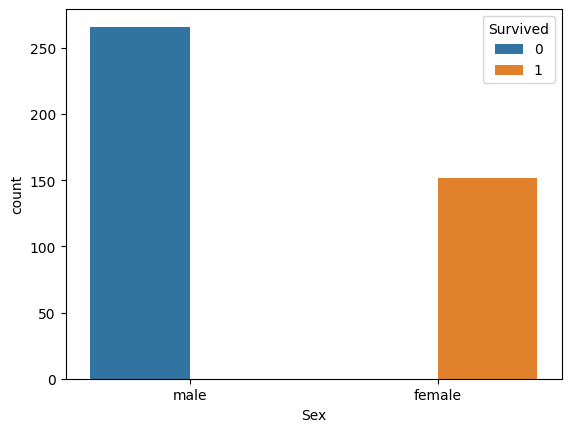

In [22]:
import seaborn as sns
sns.countplot(x='Sex', hue='Survived', data=df)

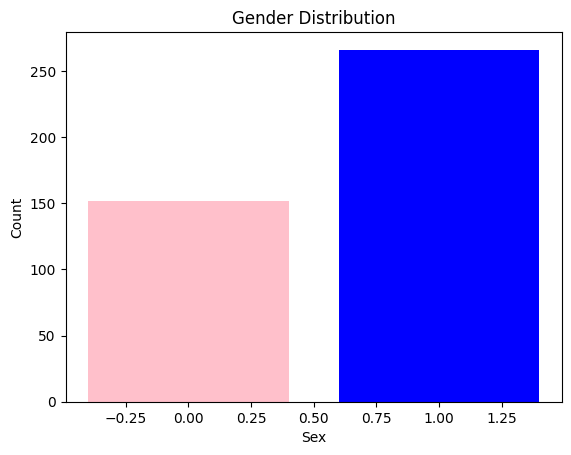

In [ ]:
gender_counts = df['Sex_male'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

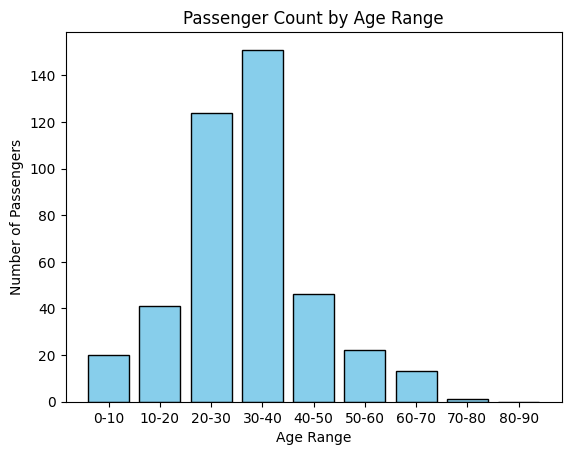

In [24]:
import matplotlib.pyplot as plt

# Define the age ranges and initialize a list to store the counts
age_ranges = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90)]
age_counts = []

# Calculate the number of passengers in each age range
for start, end in age_ranges:
    passengers_in_range = df[(df['Age'] >= start) & (df['Age'] < end)]
    age_counts.append(len(passengers_in_range))

# Create a bar chart
plt.bar([f'{start}-{end}' for start, end in age_ranges], age_counts, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age Range')
plt.ylabel('Number of Passengers')
plt.title('Passenger Count by Age Range')

# Show the plot
plt.show()


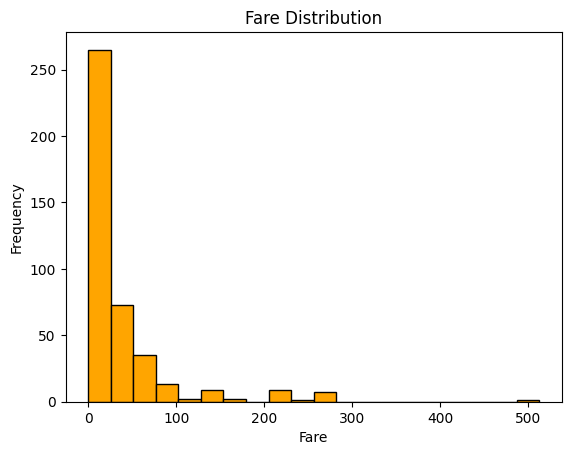

In [25]:
plt.hist(df['Fare'].dropna(), bins=20, color='orange', edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution')
plt.show()


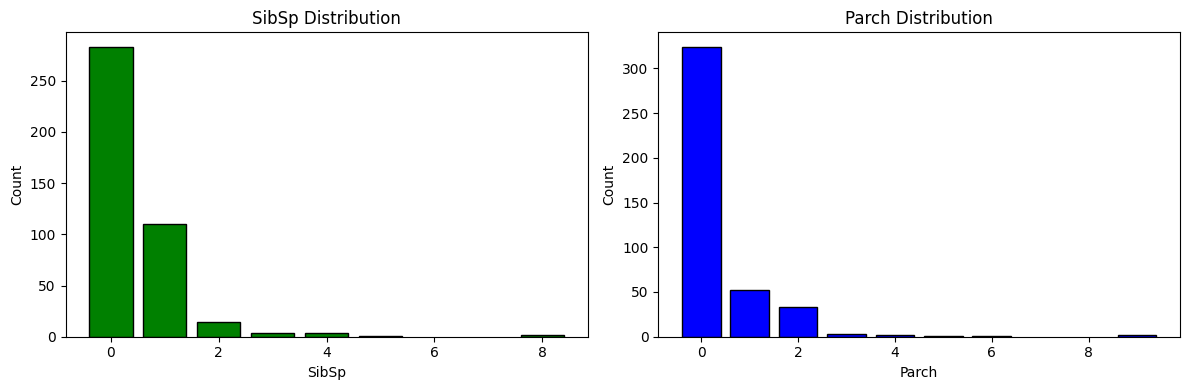

In [26]:
sibsp_counts = df['SibSp'].value_counts()
parch_counts = df['Parch'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(sibsp_counts.index, sibsp_counts.values, color='green', edgecolor='black')
ax1.set_xlabel('SibSp')
ax1.set_ylabel('Count')
ax1.set_title('SibSp Distribution')

ax2.bar(parch_counts.index, parch_counts.values, color='blue', edgecolor='black')
ax2.set_xlabel('Parch')
ax2.set_ylabel('Count')
ax2.set_title('Parch Distribution')

plt.tight_layout()
plt.show()


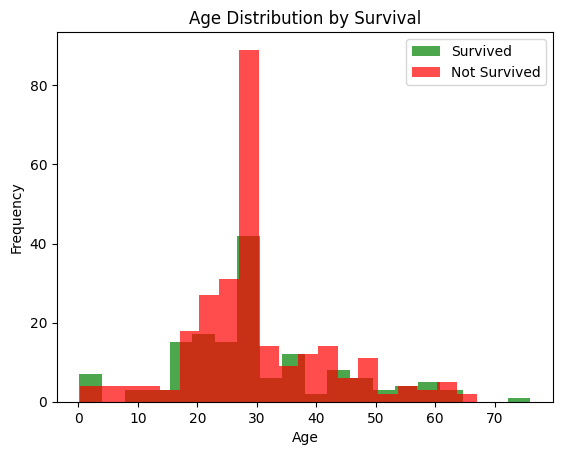

In [27]:
plt.hist(df[df['Survived'] == 1]['Age'].dropna(), bins=20, color='green', alpha=0.7, label='Survived')
plt.hist(df[df['Survived'] == 0]['Age'].dropna(), bins=20, color='red', alpha=0.7, label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()


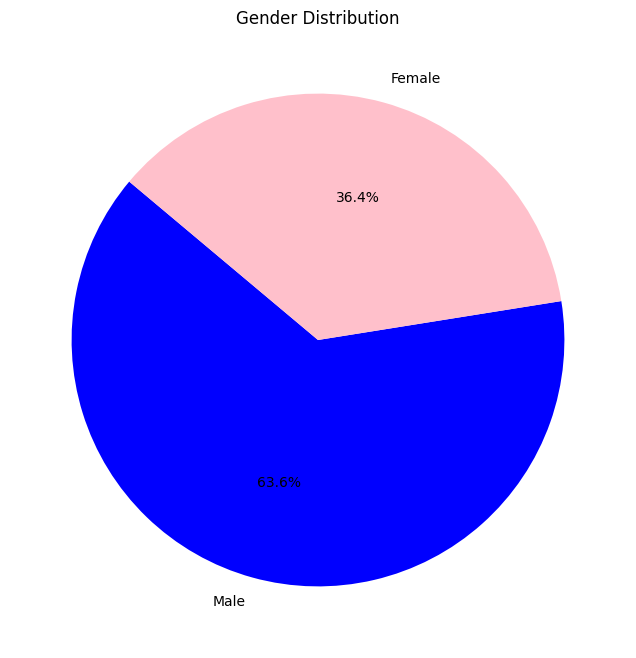

In [28]:
# Assuming 'Sex_male' is a boolean column in your dataset
gender_counts = df['Sex'].value_counts()

# Define labels and sizes for the pie chart
labels = ['Male', 'Female']
sizes = gender_counts.values

# Define colors
colors = ['blue', 'pink']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender Distribution')
plt.show()


In [35]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
0,892,0,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,2,True
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,False
2,894,0,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,2,True
3,895,0,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,False


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df['Survived']
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to your data
X = imputer.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
model = LogisticRegression()
model.fit(X_train, Y_train)

(418, 7) (334, 7) (84, 7)


LogisticRegression()

In [52]:
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [54]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [55]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]
Accuracy score of test data :  1.0


In [57]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define X (features) and y (target)
X = df[['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Apply one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=['Sex_male', 'Embarked'], drop_first=True)
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to your data
X = imputer.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')  # You can try different kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')
print(classification_report(y_test, y_pred))


Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [60]:
import xgboost as xgb

# Initialize and train the model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy_xgb*100:.2f}%')
print(classification_report(y_test, y_pred_xgb))


Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

